<a href="https://colab.research.google.com/github/Prashant-Shaw/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

## **Importing Libraries**

In [64]:
import numpy as np
import pandas as pd
from numpy import math

from geopy.distance import geodesic
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **Mounting Drive & Reading Dataset**

In [65]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [66]:
nyc_taxi_path = '/content/mydrive/MyDrive/AlmaBetter/Capstone Project - Supervised ML Regression/NYC Taxi Data.csv'
nyc_taxi_df = pd.read_csv(nyc_taxi_path)

## **Exploring The Dataset**

In [67]:
nyc_taxi_df.shape

(1458644, 11)

There are total 1458644 entries and 11 features in the dataset. Lets explore more to know the type of features.

In [68]:
#Columns in the dataset
nyc_taxi_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [69]:
#Let's look at the dataset
nyc_taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [70]:
#Checking the datatype of each features.
nyc_taxi_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

* id, pickup_datetime, dropoff_datetime, store_and_fwd_flag are of object dtype.
* vendor_id, passenger_count and trip_duration are of int dtype.
* pickup_longitude, pickup_lattitude, dropoff_longitude and dropoff_lattitude are of float dtype.

###Independent Variables - 
id, 
vendor_id, 
pickup_datetime, 
dropoff_datetime, 
passenger_count, 
pickup_longitude, 
pickup_latitude, 
dropoff_longitude, 
dropoff_latitude, 
store_and_fwd_flag

###Dependent / Target Variable -
trip_duration 

In [71]:
#Checking for null values in the dataset
nyc_taxi_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no null values in the dataset which is good.

In [72]:
#Checking the info of the dataset
nyc_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [73]:
#Checking the unique values in the dataset
nyc_taxi_df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

There are 1458644 unique entries in column 'id' which is same as number of rows in the dataset. So, there is no duplicate entries in the dataset.  

In [74]:
#Describing the dataset
nyc_taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


From the above description we infer that - 

The min passenger_count in the dataset is 0 which is not possible so this might be the error in recording the data or the driver might have entered wrongly the number of passengers to increase the trip counts so, we will drop the readings where passenger count is 0. 

## **Preprocessing & Visualizing The Data**

## **Univariate Analysis**

In [75]:
#Dropping the rows where passenger_count is 0.
nyc_taxi_df=nyc_taxi_df[nyc_taxi_df['passenger_count']!=0]

In the passenger_count the maximum entry is 9 which also doesn't seems correct. So, lets explore the passenger_count column.

In [76]:
#Extracting the count of passengers for each trip.
nyc_taxi_df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
7          3
9          1
8          1
Name: passenger_count, dtype: int64

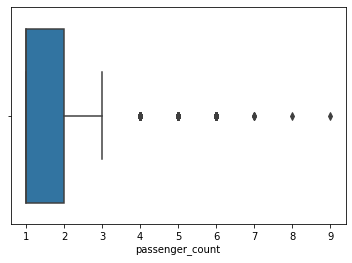

In [77]:
#Plotting boxplot for passenger_count to check the outliers.
sns.boxplot(nyc_taxi_df['passenger_count'])

In the column passenger_count for number of passengers 7, 8 & 9 there are only 3, 1 & 1 entries respectively which is very less compared to passenger_count for other trips. So, lets drop these outliers.

In [78]:
#Dropping the rows where passenger_count is 7, 8 & 9.
nyc_taxi_df=nyc_taxi_df[nyc_taxi_df['passenger_count']<7]

In [79]:
#Checking the passenger_count feature after removing the outliers.
nyc_taxi_df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

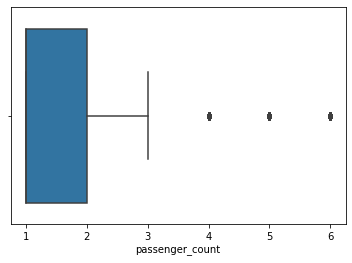

In [80]:
#Plotting boxplot again for passenger_count after removing the outliers.
sns.boxplot(nyc_taxi_df['passenger_count'])

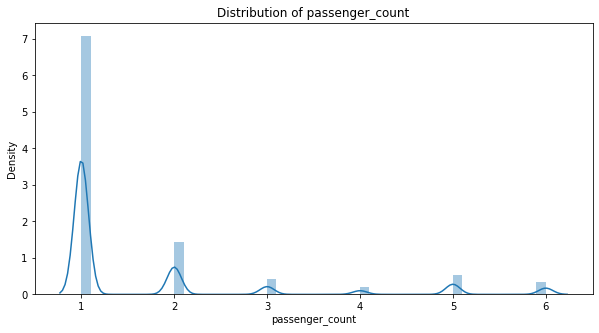

In [81]:
#Checking the distribution of passenger_count after removing the outliers.
plt.figure(figsize=(10,5))
plt.title("Distribution of passenger_count")
sns.distplot(nyc_taxi_df['passenger_count'])
plt.show()

In [82]:
#Changing the dtype of pickup_datetime & dropoff_datetime from object type to datetime.
nyc_taxi_df['pickup_datetime'] = pd.to_datetime(nyc_taxi_df['pickup_datetime'])
nyc_taxi_df['dropoff_datetime'] = pd.to_datetime(nyc_taxi_df['dropoff_datetime'])
nyc_taxi_df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

Let's develop some more features from the datetime column. As we already have a seperate trip_duration column so the datetime column we can use to extract some more useful insights to the dataset.

In [83]:
#Making two new features pickup_day and dropoff_day from datetime to get more insights to the trips day wise
nyc_taxi_df['pickup_day'] = nyc_taxi_df['pickup_datetime'].dt.day_name()
nyc_taxi_df['dropoff_day'] = nyc_taxi_df['dropoff_datetime'].dt.day_name()

In [84]:
#Extracting Hr from datetime to visualize at which time of the day most of the trips are done.
nyc_taxi_df['pickup_hr'] = nyc_taxi_df['pickup_datetime'].dt.hour
nyc_taxi_df['dropoff_hr'] = nyc_taxi_df['dropoff_datetime'].dt.hour

In [85]:
#Function to check at which time of the day (Morning, Afternoon, Evening or Night) trips are done.
def time_of_day(hr):
  if hr>=6 and hr<12:
    return 'Morning'
  elif hr>=12 and hr<17:
    return 'Afternoon'
  elif hr>=17 and hr<21:
    return 'Evening'
  else:
    return 'Night'

In [86]:
#Making columns 'pickup_timeofday' and 'dropoff_timeofday' from 'pickup_hr' and 'dropoff_hr' column
nyc_taxi_df['pickup_timeofday'] = nyc_taxi_df['pickup_hr'].apply(time_of_day)
nyc_taxi_df['dropoff_timeofday'] = nyc_taxi_df['dropoff_hr'].apply(time_of_day)

In [87]:
#Extracting trip_month from datetime to visualize which month there was more trips.
nyc_taxi_df['trip_month'] = nyc_taxi_df['pickup_datetime'].dt.month

In [88]:
#Function to get distance in km out of pickup and dropoff latitude and longitude
def get_distance_km(lat_1,long_1,lat_2,long_2):
  pick_cord = (lat_1,long_1)
  drop_cord = (lat_2,long_2)
  return geodesic(pick_cord, drop_cord).kilometers

In [89]:
#Adding a new column distance which contains the distance between pickup and drop location in km
nyc_taxi_df['distance'] = nyc_taxi_df.apply(lambda x: get_distance_km(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [90]:
nyc_taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hr,dropoff_hr,pickup_timeofday,dropoff_timeofday,trip_month,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,17,17,Evening,Evening,3,1.502172
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,0,0,Night,Night,6,1.808660
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,11,12,Morning,Afternoon,1,6.379687
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,19,19,Evening,Evening,4,1.483632
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,13,13,Afternoon,Afternoon,3,1.187038


In [91]:
# Exploring the distance feature.
nyc_taxi_df['distance'].value_counts()

0.000000     5887
2.064458        2
0.942752        2
0.000644        2
1.289928        2
             ... 
2.817283        1
26.281212       1
2.252518        1
2.133112        1
1.133655        1
Name: distance, Length: 1452682, dtype: int64

From the above data we can infer that there are 5887 entries with 0.0km distance which is again not a correct entry so we will be dropping all the entries with 0.0km entries.

In [92]:
nyc_taxi_df[nyc_taxi_df['distance']==0.0].head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hr,dropoff_hr,pickup_timeofday,dropoff_timeofday,trip_month,distance
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,Monday,Monday,18,18,Evening,Evening,2,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,Tuesday,Tuesday,18,18,Evening,Evening,5,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,Monday,Monday,23,23,Night,Night,5,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,580,Monday,Monday,19,19,Evening,Evening,1,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,27,Wednesday,Wednesday,22,22,Night,Night,1,0.0
1728,id2134482,1,2016-01-22 16:13:01,2016-01-22 16:13:20,1,-73.776314,40.645454,-73.776314,40.645454,N,19,Friday,Friday,16,16,Afternoon,Afternoon,1,0.0
1769,id2892749,1,2016-01-18 15:24:43,2016-01-18 15:28:57,5,-73.954666,40.821003,-73.954666,40.821003,Y,254,Monday,Monday,15,15,Afternoon,Afternoon,1,0.0
2087,id0931199,2,2016-05-04 22:28:43,2016-05-04 22:32:51,1,-73.954628,40.777180,-73.954628,40.777180,N,248,Wednesday,Wednesday,22,22,Night,Night,5,0.0
2441,id2251007,2,2016-05-23 14:20:49,2016-05-23 14:20:57,1,-73.781830,40.644699,-73.781830,40.644699,N,8,Monday,Monday,14,14,Afternoon,Afternoon,5,0.0
2609,id1992673,2,2016-03-02 20:10:41,2016-03-02 20:30:53,5,-73.875313,40.773682,-73.875313,40.773682,N,1212,Wednesday,Wednesday,20,20,Evening,Evening,3,0.0


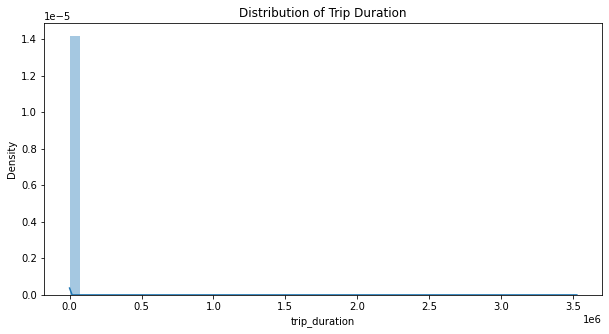

In [93]:
#Plotting distribution of target variable trip_duration.
plt.figure(figsize=(10,5))
plt.title("Distribution of Trip Duration")
sns.distplot(nyc_taxi_df['trip_duration'])
plt.show()

From the above graph we can easily infer that there are some outliers because of which the graph is highly skewed. The same thing can be seen from boxplot.

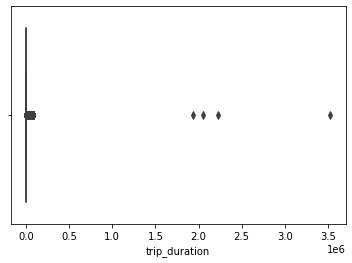

In [94]:
#Plotting boxplot for trip_duration
sns.boxplot(nyc_taxi_df['trip_duration'])

In [95]:
#Look for outlier in the trip_duration column.
nyc_taxi_df.sort_values(by = 'trip_duration', ascending = False).head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hr,dropoff_hr,pickup_timeofday,dropoff_timeofday,trip_month,distance
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,Saturday,Friday,22,18,Night,Evening,2,19.926608
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,Tuesday,Sunday,6,1,Morning,Night,1,1.633027
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,Saturday,Tuesday,22,15,Night,Afternoon,2,5.992874
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,Tuesday,Wednesday,0,11,Night,Morning,1,20.160235
1234291,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,86392,Monday,Tuesday,23,23,Night,Night,2,20.666941


After sorting out the dataset with respect to trip_duration in descending order we found out that the longest trip durations 3526282s, 2227612s, 2049578s and 1939736s are clearly outliers as the corresponding distance covered for the same trips are 19.9km, 1.6km, 5.99km and 20.16km. There might be several reasons for this - 
* The driver have enter the dropoff time wrongly.
* The driver might have forgotten to record the dropoff time and lately when he remembers he could have recorded any random time.

Clearly, time taken for for such trips shouldn't be that high so, we have to remove these outliers.

For removing these outliers I am calculating the average speed for the whole dataset and then I will use the equation, 
trip_duration = distance/average_speed 
for approximately calculating trip_duration for these outliers.

In [96]:
#Calculating the average speed considering all the entries except for the outliers.
total_distance = nyc_taxi_df.sort_values(by = 'trip_duration', ascending = False).loc[5:,['distance']].values.sum()
total_duration = nyc_taxi_df.sort_values(by = 'trip_duration', ascending = False).loc[5:,['trip_duration']].values.sum()
avg_speed = total_distance/total_duration
print(f'Total Distance - {total_distance} km')
print(f'Total Duration - {total_duration} s')
print(f'Average Speed - {avg_speed} km/s')

Total Distance - 503799.6484398022 km
Total Duration - 124279144 s
Average Speed - 0.004053774689981789 km/s


In [97]:
#Function to change the trip_duration for outliers.
def change_trip_duration(speed, distance):
  duration = distance/avg_speed
  return (int(duration))

In [98]:
#Changing the outliers for trip_duration
nyc_taxi_df.reset_index(inplace = True)
for rows in range(1,nyc_taxi_df.shape[0]):
  if nyc_taxi_df['trip_duration'][rows] > 1000000:
    nyc_taxi_df['trip_duration'][rows] = change_trip_duration(avg_speed, nyc_taxi_df['distance'][rows])
    #print (nyc_taxi_df['trip_duration'][i])

nyc_taxi_df.sort_values(by = 'trip_duration', ascending = False).head()

,index,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_hr,dropoff_hr,pickup_timeofday,dropoff_timeofday,trip_month,distance
1234240,1234291,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,86392,Monday,Tuesday,23,23,Night,Night,2,20.666941
295376,295382,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,86391,Tuesday,Wednesday,13,13,Afternoon,Afternoon,5,21.147722
73815,73816,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,N,86390,Friday,Saturday,0,0,Night,Night,5,2.005244
59891,59891,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,N,86387,Thursday,Friday,16,16,Afternoon,Afternoon,6,6.199703
1360381,1360439,id1358458,2,2016-06-23 16:01:45,2016-06-24 16:01:30,1,-73.782089,40.644806,-73.985016,40.666828,N,86385,Thursday,Friday,16,16,Afternoon,Afternoon,6,17.335134


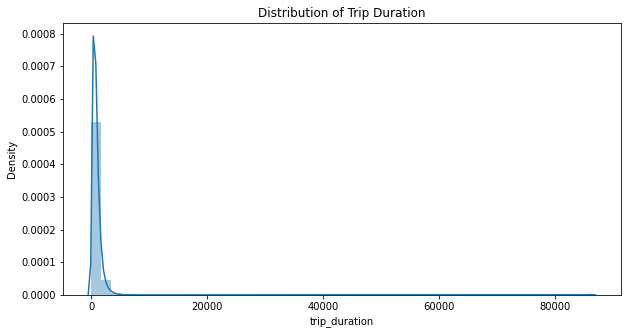

In [99]:
#Checking the distribution of trip_duration again after removing the outliers.
plt.figure(figsize=(10,5))
plt.title("Distribution of Trip Duration")
sns.distplot(nyc_taxi_df['trip_duration'])
plt.show()

After removing the outlier skewness is improved still there is some skewness in the data which will improve after doing the log transformation of the data.

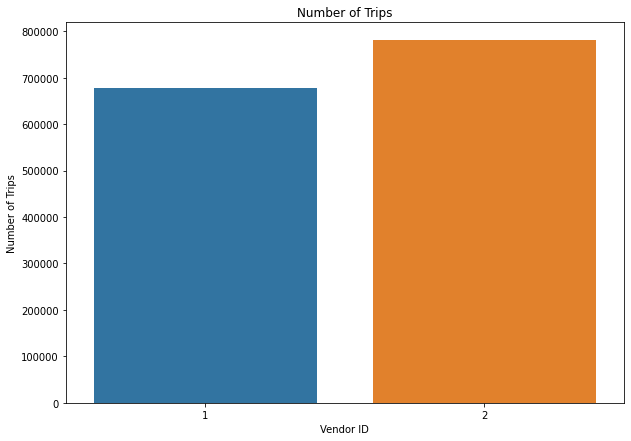

In [100]:
#Plotting countplot for vendor_id.
plt.figure(figsize=(10,7))
plt.title("Number of Trips")
sns.countplot(x = 'vendor_id', data = nyc_taxi_df)
plt.xlabel("Vendor ID")
plt.ylabel("Number of Trips")
plt.show()

The trips taken by both the vendors are almost same though vendor 2 have done more trips than vendor 1.